In [28]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [29]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [30]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [31]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d
> PupilGrabber done grabbing 5 seconds of pupil.1.3d


In [32]:
data = pgr_future.result()
data[0]

{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.40157968896692925, 0.643970360708263],
 'diameter': 57.50228412496352,
 'confidence': 0.516255818052977,
 'timestamp': 698622.875285,
 'sphere': {'center': [4.7466554236863,
   -2.7587795329318494,
   41.547340307330536],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [128.19819122707688, 77.1294441588879],
  'axes': [169.2920051543783, 169.2920051543783],
  'angle': 0.0},
 'circle_3d': {'center': [-1.8354742485162676,
   -3.168222748881512,
   33.51565771703706],
  'normal': [-0.6333657230145292, -0.03939869182440062, -0.7728490175919281],
  'radius': 3.015923015228538},
 'diameter_3d': 6.031846030457076,
 'ellipse': {'center': [77.10330028165042, 68.35769074401352],
  'axes': [44.957933794291904, 57.50228412496352],
  'angle': 8.459776379957987},
 'location': [77.10330028165042, 68.35769074401352],
 'model_confidence': 1.0,
 'theta': 1.610205218561044,
 'phi': -2.2573272803408}

Text(0.5, 0, 'Pupil timestamp (s)')

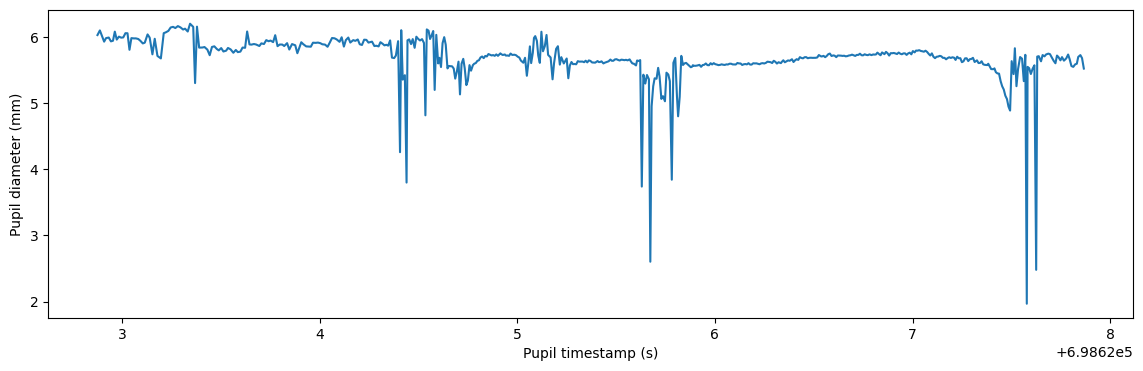

In [33]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')